# Performing Image Clustering Using KMeans

Author: Jordan A. Caraballo-Vega
Version: 2024.03.12

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

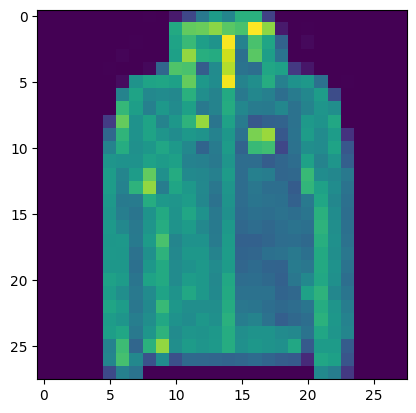

In [5]:
plt.imshow(x_train[567, :, :])

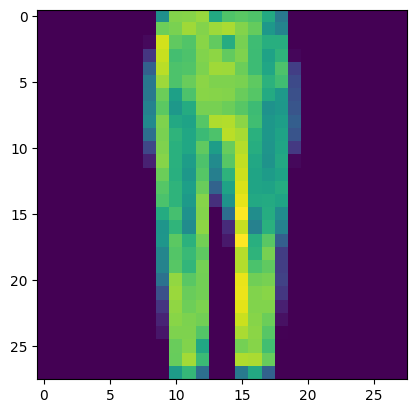

In [6]:
plt.imshow(x_train[1020, :, :])

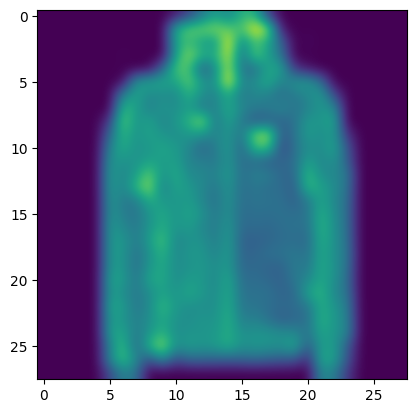

In [11]:
# ValueError: 'cubic' is not a valid value for interpolation; supported values are 'antialiased', 'none', 'nearest',
# 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom',
# 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman'
plt.imshow(x_train[567, :, :], interpolation="bicubic")

In [13]:
smaller_x_train = x_train[:5000, :, :]
smaller_x_train.shape

(5000, 28, 28)

In [14]:
smaller_x_train.min(), smaller_x_train.max()

(0, 255)

In [15]:
# Normalize the data
smaller_x_train = smaller_x_train / 255.0
smaller_x_train.min(), smaller_x_train.max()

(0.0, 1.0)

In [16]:
x_train_normalized = smaller_x_train.reshape(smaller_x_train.shape[0], -1)
x_train_normalized.shape

(5000, 784)

In [17]:
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_normalized)
x_train_pca.shape

(5000, 174)

In [18]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(x_train_pca)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 8, ..., 1, 5, 2], dtype=int32)

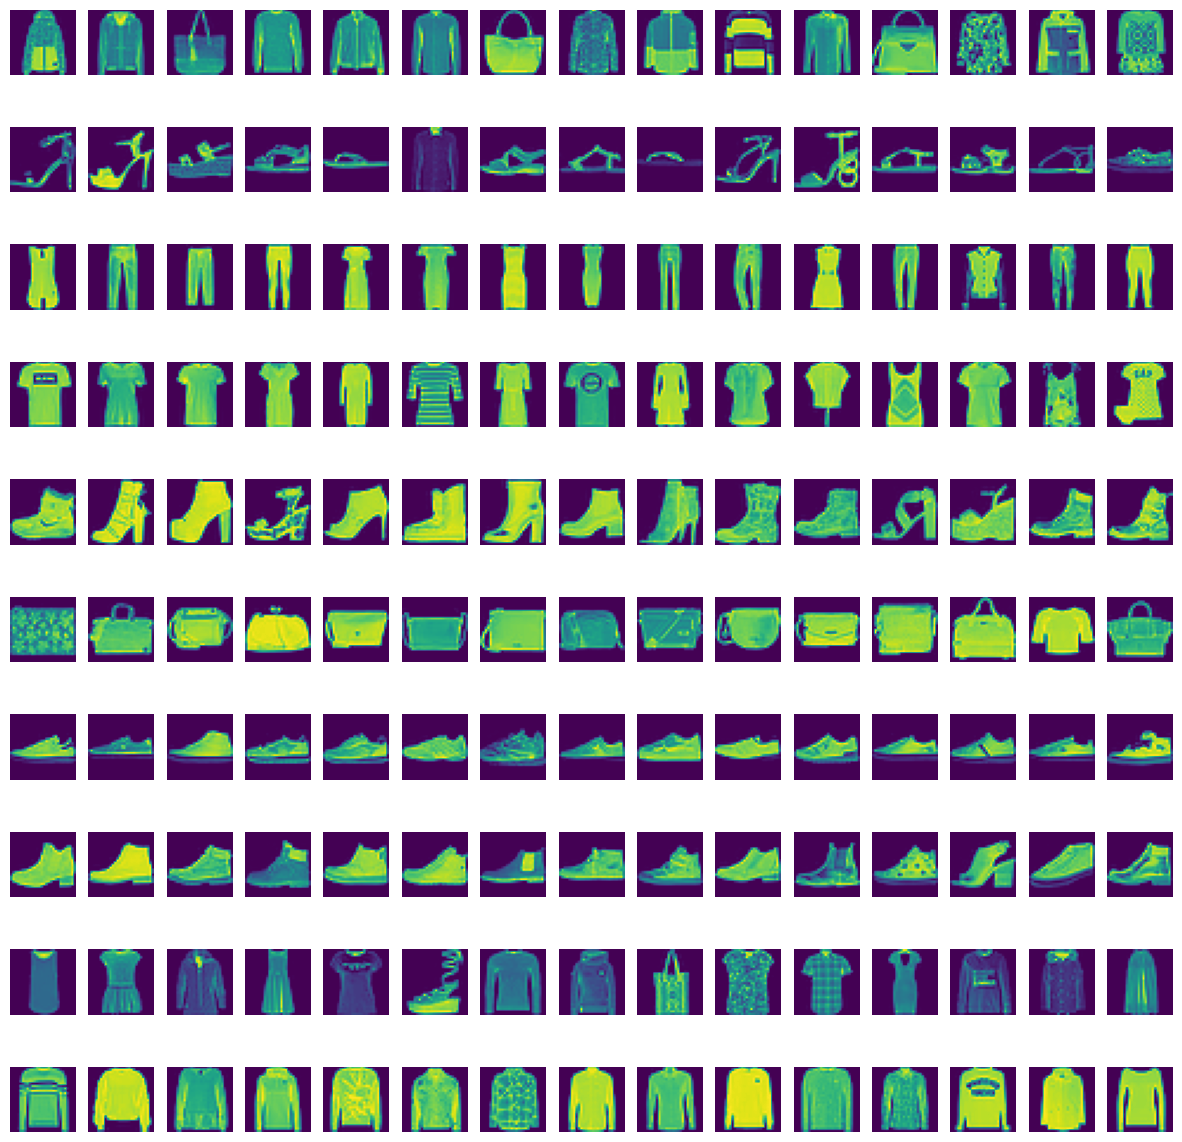

In [19]:
fig, axs = plt.subplots(10, 15, figsize=(15, 15))
for i in range(10):  # For each cluster
    cluster_indices = np.where(labels == i)[0]
    for j in range(15):  # Show 10 examples
        axs[i, j].imshow(smaller_x_train[cluster_indices[j]])
        axs[i, j].axis('off')
plt.show()

In [27]:
tsne = TSNE(n_components=3)
x_train_tsne = tsne.fit_transform(x_train_normalized)
x_train_tsne.shape

(5000, 3)

In [28]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(x_train_tsne)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 1, 8, ..., 9, 3, 8], dtype=int32)

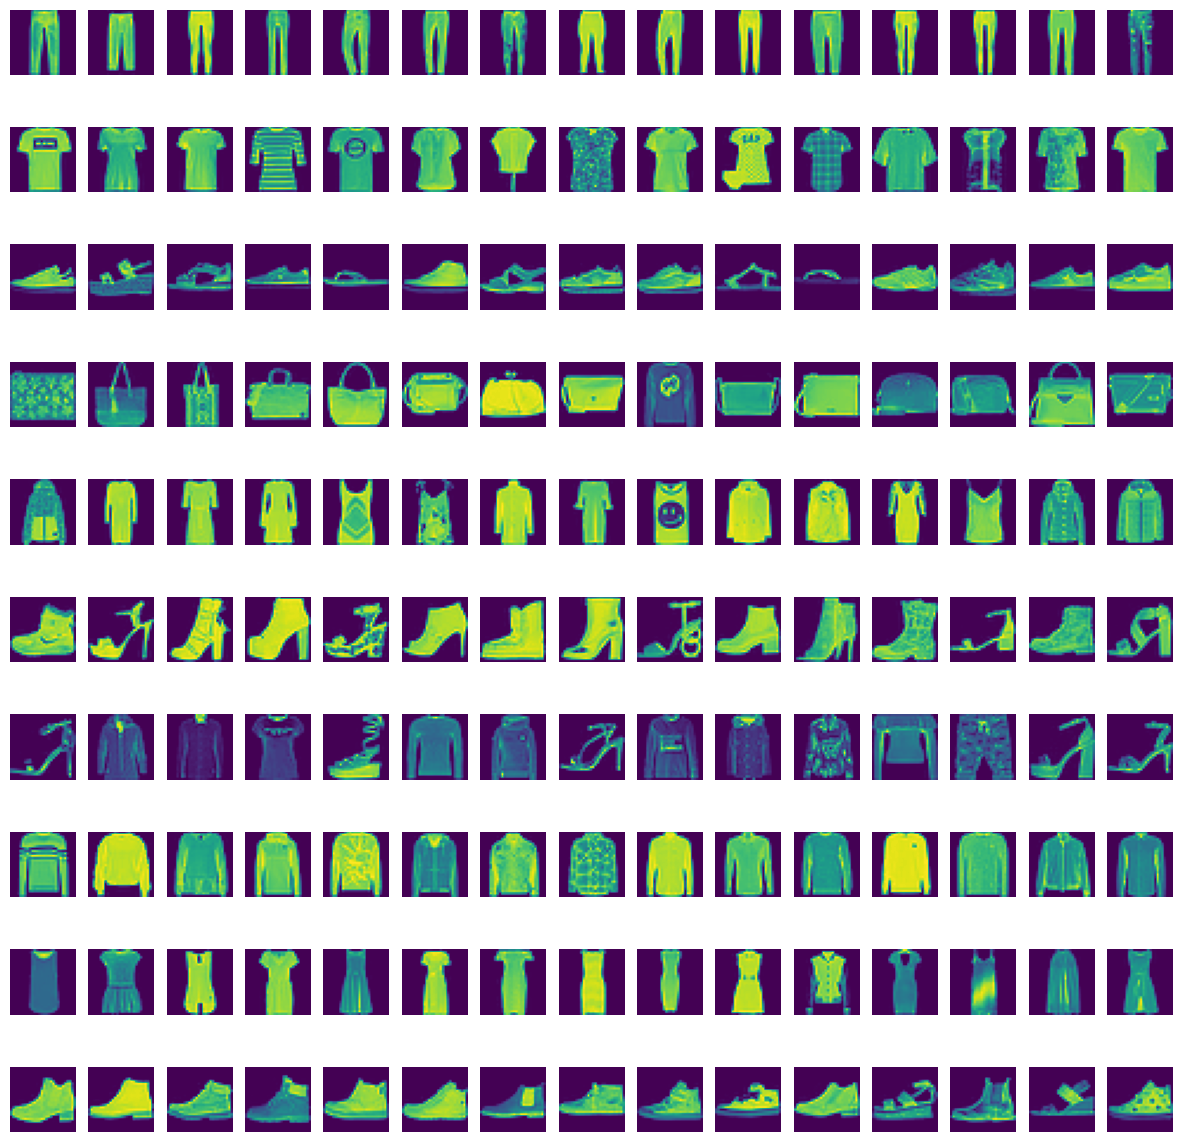

In [29]:
fig, axs = plt.subplots(10, 15, figsize=(15, 15))
for i in range(10):  # For each cluster
    cluster_indices = np.where(labels == i)[0]
    for j in range(15):  # Show 10 examples
        axs[i, j].imshow(smaller_x_train[cluster_indices[j]])
        axs[i, j].axis('off')
plt.show()